# Ejercicio 1: Introducción a Recuperación de Información

## Objetivo de la práctica
- Entender el problema de **buscar información** en colecciones de texto.
- Comprender por qué se necesita un **índice invertido** en recuperación de información.
- Programar una primera solución manual y luego optimizarla con un índice.
- Evaluar la mejora en tiempos de búsqueda cuando usamos estructuras adecuadas.

## Parte 1: Búsqueda lineal en documentos

### Actividad
1. Se te proporcionará un conjunto de documentos de texto.
2. Escribe una función que:
   - Lea todos los documentos.
   - Busque una palabra ingresada por el usuario.
   - Muestre en qué documentos aparece la palabra.

In [3]:
import os

search_word = "Quito"
DATASET_PATH = "../data"

def find(query: str) -> list:
    results=[]
    files = [f for f in os.listdir(DATASET_PATH)]
    
    for corpus in files:
        corpus_path = os.path.join(DATASET_PATH, corpus)
        
        with open(corpus_path, 'r', encoding='utf-8') as corpus:
            for doc in corpus:  
                if search_word in doc.split():
                    results.append(doc.strip())


    return results

results = find(search_word)
        
if not results:
    print(f"No matches found for '{search_word}'.")

else:
    print(results)

['La ciudad de Quito cuenta con un centro histórico declarado Patrimonio de la Humanidad por la UNESCO.', 'Quito tiene un centro histórico Patrimonio de la Humanidad Perfecto para surf.', 'Quito tiene un centro histórico Patrimonio de la Humanidad Ideal para el próximo feriado.', 'Quito tiene un centro histórico Patrimonio de la Humanidad Un lugar sorprendente para visitar.', 'Quito tiene un centro histórico Patrimonio de la Humanidad Perfecto para rafting.', 'Quito tiene un centro histórico Patrimonio de la Humanidad Perfecto para senderismo.', 'Quito tiene un centro histórico Patrimonio de la Humanidad Ideal para el próximo feriado.', 'Quito tiene un centro histórico Patrimonio de la Humanidad Ideal para el próximo feriado.', 'Quito tiene un centro histórico Patrimonio de la Humanidad', 'Quito tiene un centro histórico Patrimonio de la Humanidad Perfecto para canopy.', 'Quito tiene un centro histórico Patrimonio de la Humanidad Perfecto para canopy.', 'Quito tiene un centro histórico

## Parte 2: Construcción de un índice invertido

### Actividad
1. Escribe un programa que:
   - Recorra todos los documentos.
   - Construya un **índice invertido**, es decir, un diccionario donde:
     - Cada palabra clave apunta a una lista de documentos donde aparece.

2. Escribe una nueva función de búsqueda que:
   - Consulte directamente el índice para encontrar los documentos relevantes.
   - Sea mucho más rápida que la búsqueda lineal.

In [6]:
import os
import time

DATASET_PATH = "../data"

# Función para construir el índice invertido
def build_inverted_index():
    inverted_index = {}
    files = [f for f in os.listdir(DATASET_PATH)]
    
    for corpus_name in files:
        corpus_path = os.path.join(DATASET_PATH, corpus_name)
        
        with open(corpus_path, 'r', encoding='utf-8') as corpus:
            for doc_id, doc in enumerate(corpus, 1):  # Enumerate desde 1 para mejor legibilidad
                words = doc.strip().split()
                
                for word in words:
                    if word not in inverted_index:
                        inverted_index[word] = {}
                    
                    if corpus_name not in inverted_index[word]:
                        inverted_index[word][corpus_name] = []
                    
                    # Guardamos el número de documento y su contenido
                    inverted_index[word][corpus_name].append({
                        'doc_id': doc_id,
                        'content': doc.strip()
                    })
    
    return inverted_index

# Función para buscar usando el índice invertido
def search_with_index(query, index):
    if query not in index:
        return []
    
    results = []
    for corpus_name, docs in index[query].items():
        for doc in docs:
            results.append({
                'corpus': corpus_name,
                'doc_id': doc['doc_id'],
                'content': doc['content']
            })
    return results

# Construimos el índice invertido
start_time = time.time()
index = build_inverted_index()
build_time = time.time() - start_time
print(f"Índice invertido construido en {build_time:.4f} segundos")
print(f"El índice contiene {len(index)} términos únicos")
print("\nÍndice invertido construido:")
print(index)

# Ejemplo de búsqueda usando el índice
search_word = "Quito"
start_time = time.time()
results = search_with_index(search_word, index)
search_time = time.time() - start_time

if not results:
    print(f"\nNo matches found for '{search_word}'.")
else:
    print(f"\nFound '{search_word}' in {len(results)} documents:")
    for result in results:
        print(f"Corpus: {result['corpus']}, Document #{result['doc_id']}:")
        print(f"  {result['content']}")
    print(f"Búsqueda completada en {search_time:.6f} segundos")

Índice invertido construido en 0.0041 segundos
El índice contiene 189 términos únicos

Índice invertido construido:
{'Ecuador': {'01_corpus_turismo.txt': [{'doc_id': 1, 'content': 'Ecuador es un país megadiverso, con playas, montañas y selvas ideales para el turismo ecológico.'}], '01_corpus_turismo_500.txt': [{'doc_id': 5, 'content': 'Ecuador es un país megadiverso, ideal para el turismo ecológico'}, {'doc_id': 22, 'content': 'Ecuador es un país megadiverso, ideal para el turismo ecológico Perfecto para avistamiento de aves.'}, {'doc_id': 30, 'content': 'Ecuador es un país megadiverso, ideal para el turismo ecológico Ideal para el próximo feriado.'}, {'doc_id': 37, 'content': 'Ecuador es un país megadiverso, ideal para el turismo ecológico Perfecto para canopy.'}, {'doc_id': 41, 'content': 'Ecuador es un país megadiverso, ideal para el turismo ecológico Un lugar increíble para visitar.'}, {'doc_id': 45, 'content': 'Ecuador es un país megadiverso, ideal para el turismo ecológico Perfec

## Parte 3: Evaluación de tiempos de búsqueda
### Actividad

1. Realiza la búsqueda de varias palabras usando:
      -  Corpus pequeño: 16 documentos (turismo en Ecuador).
      -  Corpus grande: 500 documentos (versión ampliada).
2. Mide el tiempo de ejecución:
      -  Para búsqueda lineal.
      -  Para búsqueda usando índice invertido.
      -  Grafica o presenta los resultados en una tabla comparativa.

### Ejemplo de palabras para buscar
- quito
- montañita
- feriado
- playas
- aventura
- galápagos

In [8]:
!pip install pandas matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.4/11.4 MB 3.7 MB/s eta 0:00:00m eta 0:00:010:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 3.9 MB/s eta 0:00:000:00:01m eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 2.8 MB/s eta 0:00:00 MB/s eta 0:00:01:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 2.2 MB/s eta 0:00:002.2 MB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 2.3 MB/s eta 0:00:002.2 MB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11/11 [matplotlib]0m 10/11 [matplotlib]tools]


Matplotlib is building the font cache; this may take a moment.
/var/folders/dd/pww_0gc97v7f50f2xt_j22xc0000gn/T/ipykernel_69489/3275054732.py:45: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_df = results_df._append({



Resultados de la comparación:
  Palabra Método  Tiempo (s) Documentos encontrados
    Quito Lineal    0.000318                     21
    Quito Índice    0.000005                     21
Montañita Lineal    0.000447                     75
Montañita Índice    0.000013                     75
  feriado Lineal    0.000294                      1
  feriado Índice    0.000003                      1
   playas Lineal    0.000299                     49
   playas Índice    0.000008                     49
 aventura Lineal    0.000283                     33
 aventura Índice    0.000007                     33
Galápagos Lineal    0.000278                     34
Galápagos Índice    0.000006                     34


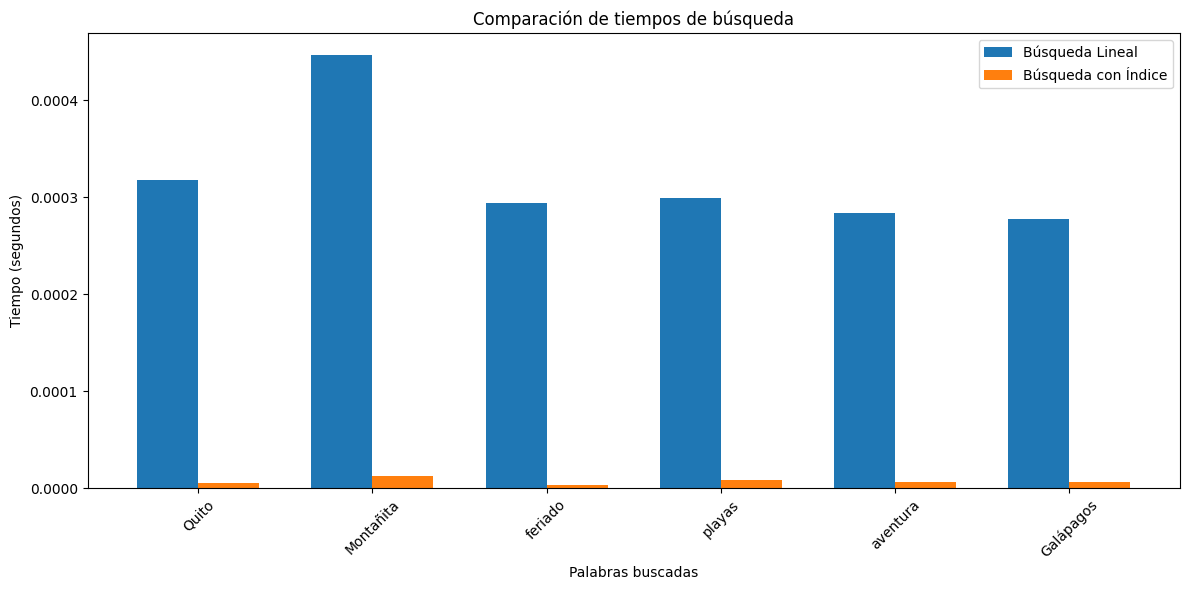


Speedup promedio: 45.22x


In [9]:
import os
import time
import pandas as pd
import matplotlib.pyplot as plt

# Reutilizamos las funciones de búsqueda anteriores
def linear_search(query: str, dataset_path: str) -> list:
    results = []
    files = [f for f in os.listdir(dataset_path)]
    
    for corpus in files:
        corpus_path = os.path.join(dataset_path, corpus)
        with open(corpus_path, 'r', encoding='utf-8') as file:
            for doc_id, doc in enumerate(file, 1):
                if query in doc.split():
                    results.append({
                        'corpus': corpus,
                        'doc_id': doc_id,
                        'content': doc.strip()
                    })
    return results

# Construimos el índice una sola vez
index = build_inverted_index()  # Usando la función definida en la Parte 2

# Lista de palabras a buscar
search_words = ['Quito', 'Montañita', 'feriado', 'playas', 'aventura', 'Galápagos']

# Almacenaremos los resultados de tiempo
results_df = pd.DataFrame(columns=['Palabra', 'Método', 'Tiempo (s)', 'Documentos encontrados'])

# Realizar búsquedas y medir tiempos
for word in search_words:
    # Búsqueda lineal
    start_time = time.time()
    linear_results = linear_search(word, DATASET_PATH)
    linear_time = time.time() - start_time
    
    # Búsqueda con índice
    start_time = time.time()
    index_results = search_with_index(word, index)
    index_time = time.time() - start_time
    
    # Guardar resultados
    results_df = results_df._append({
        'Palabra': word,
        'Método': 'Lineal',
        'Tiempo (s)': linear_time,
        'Documentos encontrados': len(linear_results)
    }, ignore_index=True)
    
    results_df = results_df._append({
        'Palabra': word,
        'Método': 'Índice',
        'Tiempo (s)': index_time,
        'Documentos encontrados': len(index_results)
    }, ignore_index=True)

# Mostrar tabla de resultados
print("\nResultados de la comparación:")
print(results_df.to_string(index=False))

# Crear gráfica comparativa
plt.figure(figsize=(12, 6))
words = results_df['Palabra'].unique()
linear_times = results_df[results_df['Método'] == 'Lineal']['Tiempo (s)']
index_times = results_df[results_df['Método'] == 'Índice']['Tiempo (s)']

x = range(len(words))
width = 0.35

plt.bar([i - width/2 for i in x], linear_times, width, label='Búsqueda Lineal')
plt.bar([i + width/2 for i in x], index_times, width, label='Búsqueda con Índice')

plt.xlabel('Palabras buscadas')
plt.ylabel('Tiempo (segundos)')
plt.title('Comparación de tiempos de búsqueda')
plt.xticks(x, words, rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

# Calcular speedup promedio
speedup = linear_times.mean() / index_times.mean()
print(f"\nSpeedup promedio: {speedup:.2f}x")

## Parte 4:
### Actividad
1. Modifica el índice para que ignore mayúsculas/minúsculas (por ejemplo, "Playa" y "playa" deben considerarse iguales).
2. Permite consultas de múltiples términos (ejemplo: buscar documentos que contengan "playa" y "turismo").
3. Calcula el _speedup_

In [11]:
import os
import time

DATASET_PATH = "../data"

# Función para construir el índice invertido case-insensitive
def build_case_insensitive_index():
    inverted_index = {}
    files = [f for f in os.listdir(DATASET_PATH)]
    
    for corpus_name in files:
        corpus_path = os.path.join(DATASET_PATH, corpus_name)
        
        with open(corpus_path, 'r', encoding='utf-8') as corpus:
            for doc_id, doc in enumerate(corpus, 1):
                words = doc.strip().split()
                
                for word in words:
                    # Convertimos a minúsculas para el índice
                    word_lower = word.lower()
                    
                    if word_lower not in inverted_index:
                        inverted_index[word_lower] = {}
                    
                    if corpus_name not in inverted_index[word_lower]:
                        inverted_index[word_lower][corpus_name] = []
                    
                    inverted_index[word_lower][corpus_name].append({
                        'doc_id': doc_id,
                        'content': doc.strip()
                    })
    
    return inverted_index

# Función para búsqueda multi-término
def multi_term_search(query_terms: list, index: dict) -> list:
    # Convertimos todos los términos a minúsculas
    terms = [term.lower() for term in query_terms]
    
    if not terms:
        return []
    
    # Buscamos documentos que contengan el primer término
    if terms[0] not in index:
        return []
    
    # Inicializamos con los resultados del primer término
    results = {}
    for corpus_name, docs in index[terms[0]].items():
        for doc in docs:
            doc_key = (corpus_name, doc['doc_id'])
            results[doc_key] = {
                'corpus': corpus_name,
                'doc_id': doc['doc_id'],
                'content': doc['content']
            }
    
    # Filtramos por los demás términos
    for term in terms[1:]:
        if term not in index:
            return []
        
        # Mantenemos solo los documentos que contengan todos los términos
        current_docs = set()
        for corpus_name, docs in index[term].items():
            for doc in docs:
                current_docs.add((corpus_name, doc['doc_id']))
        
        # Eliminamos documentos que no contengan el término actual
        results = {k: v for k, v in results.items() if k in current_docs}
        
        if not results:
            return []
    
    return list(results.values())

# Construimos el índice case-insensitive
start_time = time.time()
index = build_case_insensitive_index()
build_time = time.time() - start_time
print(f"Índice invertido construido en {build_time:.4f} segundos")
print(f"El índice contiene {len(index)} términos únicos")

# Ejemplos de búsqueda
search_examples = [
    ["turismo"],  # Búsqueda simple
    ["PLAYA"],  # Misma búsqueda en mayúsculas
    ["playa", "turismo"],  # Búsqueda multi-término
    ["sol", "arena", "mar"]  # Búsqueda con tres términos
]

print("\nPruebas de búsqueda:")
for terms in search_examples:
    print(f"\nBuscando: {terms}")
    start_time = time.time()
    results = multi_term_search(terms, index)
    search_time = time.time() - start_time
    
    if not results:
        print(f"No se encontraron documentos con todos los términos: {terms}")
    else:
        print(f"Encontrados {len(results)} documentos:")
        for result in results:
            print(f"Corpus: {result['corpus']}, Document #{result['doc_id']}:")
            print(f"  {result['content']}")
    print(f"Tiempo de búsqueda: {search_time:.6f} segundos")

# Comparación de rendimiento
print("\nComparación de rendimiento:")
linear_time = time.time()
linear_results = []
for term in ["playa", "turismo"]:
    for corpus in os.listdir(DATASET_PATH):
        with open(os.path.join(DATASET_PATH, corpus), 'r', encoding='utf-8') as f:
            for line in f:
                if term.lower() in line.lower():
                    linear_results.append(line.strip())
linear_time = time.time() - linear_time

index_time = time.time()
index_results = multi_term_search(["playa", "turismo"], index)
index_time = time.time() - index_time

speedup = linear_time / index_time
print(f"Tiempo búsqueda lineal: {linear_time:.6f} segundos")
print(f"Tiempo búsqueda con índice: {index_time:.6f} segundos")
print(f"Speedup: {speedup:.2f}x")

Índice invertido construido en 0.0043 segundos
El índice contiene 180 términos únicos

Pruebas de búsqueda:

Buscando: ['turismo']
Encontrados 37 documentos:
Corpus: 01_corpus_turismo.txt, Document #1:
  Ecuador es un país megadiverso, con playas, montañas y selvas ideales para el turismo ecológico.
Corpus: 01_corpus_turismo_500.txt, Document #5:
  Ecuador es un país megadiverso, ideal para el turismo ecológico
Corpus: 01_corpus_turismo_500.txt, Document #22:
  Ecuador es un país megadiverso, ideal para el turismo ecológico Perfecto para avistamiento de aves.
Corpus: 01_corpus_turismo_500.txt, Document #30:
  Ecuador es un país megadiverso, ideal para el turismo ecológico Ideal para el próximo feriado.
Corpus: 01_corpus_turismo_500.txt, Document #37:
  Ecuador es un país megadiverso, ideal para el turismo ecológico Perfecto para canopy.
Corpus: 01_corpus_turismo_500.txt, Document #41:
  Ecuador es un país megadiverso, ideal para el turismo ecológico Un lugar increíble para visitar.
Cor